In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
dataset = pd.read_csv('dataset/Example_AP.csv')
dataset.head()

,Rank,Correct,Precision,Recall
0,1,True,1.00,0.2
1,2,True,1.00,0.4
2,3,False,0.67,0.4
3,4,False,0.50,0.4
4,5,False,0.40,0.4


dataset.show()

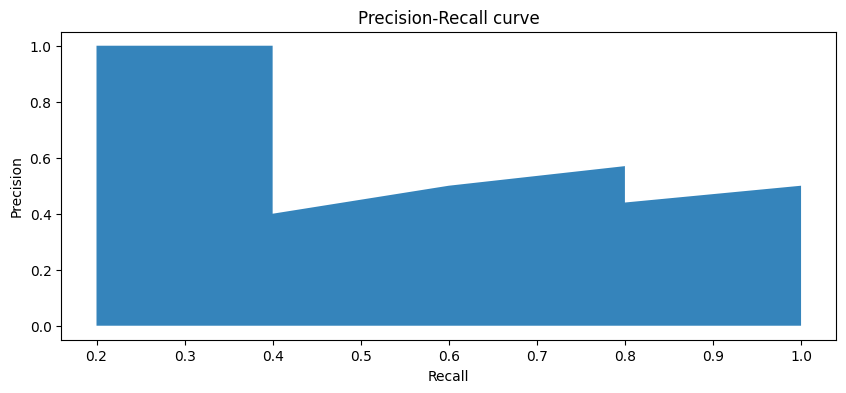

In [22]:
import matplotlib.pyplot as plt

def plot_static_precision_recall_curve(fpr, tpr):
    plt.figure(figsize=[10,4])
    plt.fill_between(fpr, tpr, alpha=.9)
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.title("Precision-Recall curve");
    plt.show()
    
plot_static_precision_recall_curve(dataset['Recall'], dataset['Precision'])

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


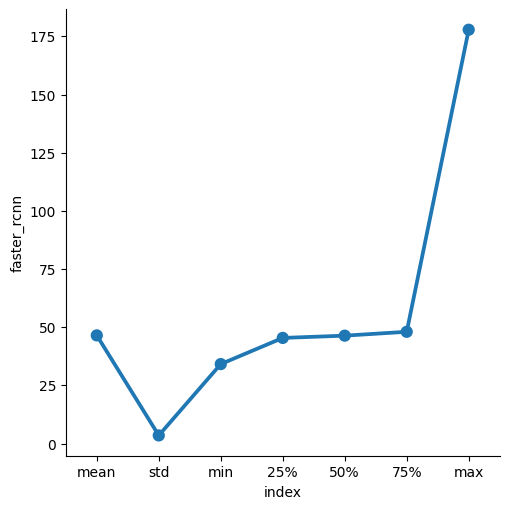

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


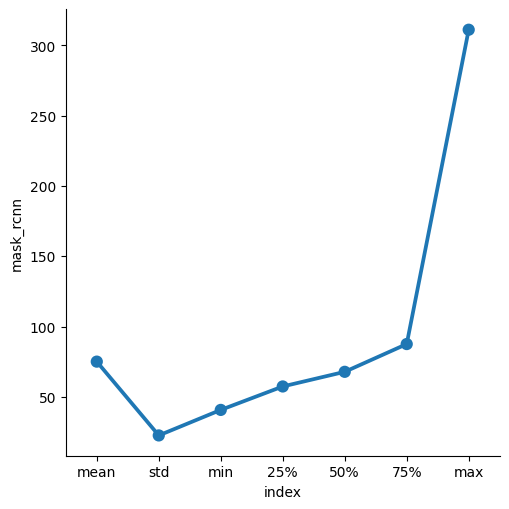

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


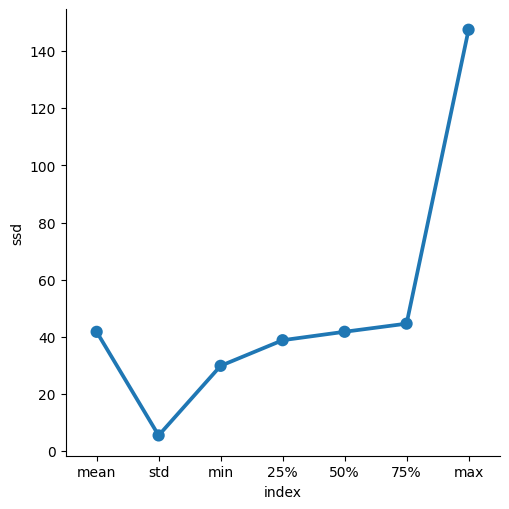

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


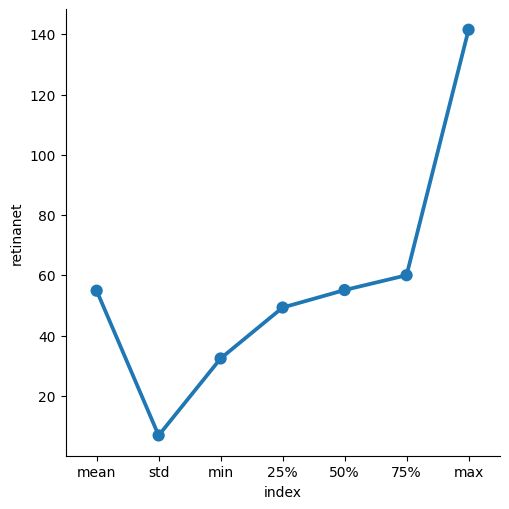

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


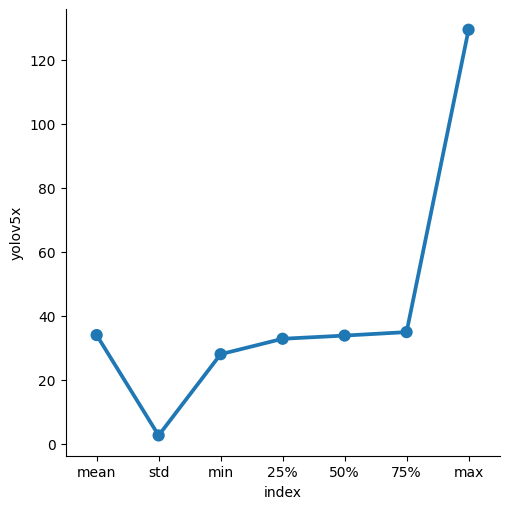

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


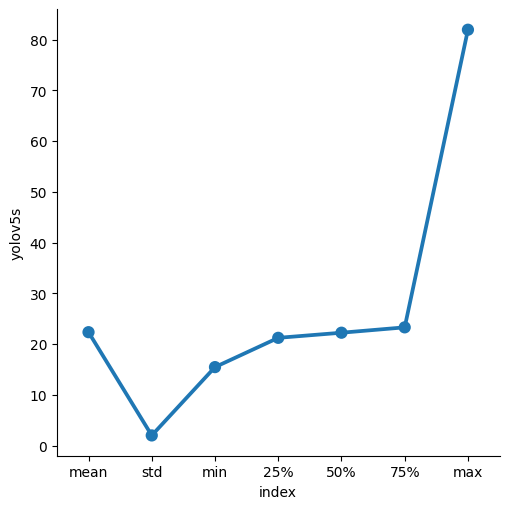

/Users/bariscekic/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


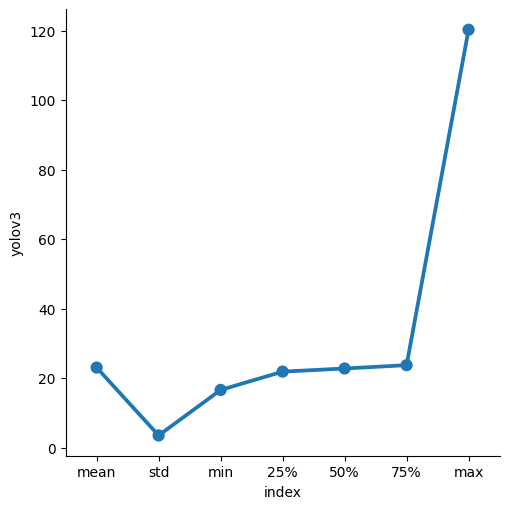

In [4]:
gpu_stats = pd.read_json('stats/V100/stats_V100.json')
yolov3_stats = pd.read_json('stats/V100/stats_yoloV3_V100.json')

final_df = pd.concat([gpu_stats, yolov3_stats], axis=1)
final_df.head()
final_df.describe().drop(columns=['name'])
describe_num_df = final_df.describe().drop(columns=['name'])
describe_num_df.reset_index(inplace=True)

describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in describe_num_df.columns:
  if i in ['index']:
    continue
  sns.factorplot(x="index", y=i, data=describe_num_df)
  plt.show()

In [5]:
final_df = pd.concat([gpu_stats, yolov3_stats], axis=1)
final_df.describe()

,name,faster_rcnn,mask_rcnn,ssd,retinanet,yolov5x,yolov5s,name,yolov3
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,289445.435574,46.512794,75.161254,41.795672,54.921100,34.041054,22.373843,289445.435574,23.047981
std,167545.011038,3.510956,22.672327,5.539385,6.902272,2.662905,2.027286,167545.011038,3.498466
min,139.000000,34.175648,40.827904,29.900385,32.441921,28.061695,15.491200,139.000000,16.598017
25%,147726.000000,45.424521,57.500160,38.862334,49.333049,32.890577,21.260664,147726.000000,21.876105
50%,289551.000000,46.393793,67.918610,41.815151,55.136848,33.885393,22.268336,289551.000000,22.777744
75%,435061.500000,48.057239,87.662586,44.656664,60.057920,34.976247,23.327289,435061.500000,23.733992
max,581482.000000,177.879196,311.188995,147.507431,141.503387,129.522720,81.972931,581482.000000,120.342209


In [6]:
df = pd.read_csv('eval/algorithmComparison_V100.csv')

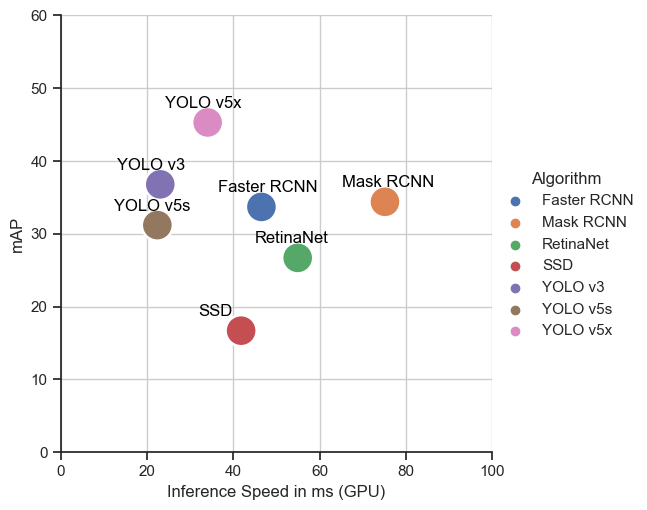

In [11]:

sns.relplot(x="Inference", y="AP", data=df, hue="Algorithm", s=500)
sns.set(style="ticks")
plt.grid()
plt.xlabel('Inference Speed in ms (GPU)')
plt.ylabel('mAP')
plt.xlim(0, 100)
plt.ylim(0, 60)

# add annotations one by one with a loop
for line in range(0,df.shape[0]):
     plt.text(df.Inference[line]-10, df.AP[line]+2, df.Algorithm[line], horizontalalignment='left', size='medium', color='black', weight='regular')

plt.show()